<a href="https://colab.research.google.com/github/estebanoli8/secop_obras_valle/blob/main/feb_2026_obras_infrastructura_valle_desde_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to Colab!

## Actualizar Parámetros de Búsqueda

### Subtask:
Se actualizará la fecha de inicio a `2022-01-01` y se redefinirán las palabras clave para `keywords_infraestructura` para incluir variaciones de 'Gobernación del Valle', 'Secretaría de Infraestructura del Valle' y sus posibles abreviaciones.


**Reasoning**:
I will update the `start_date` to '2022-01-01' and redefine the `keywords_infraestructura` list with the specified variations, then print both variables to confirm the changes, as instructed by the subtask.



In [ ]:
start_date = '2022-01-01'

keywords_infraestructura = [
    'Gobernación del Valle del Cauca',
    'Gobernacion del Valle del Cauca',
    'Gobernación del Valle',
    'Gobernacion del Valle',
    'Gob Valle',
    'Secretaría de Infraestructura del Valle del Cauca',
    'Secretaria de Infraestructura del Valle del Cauca',
    'Secretaría de Infraestructura del Valle',
    'Secretaria de Infraestructura del Valle',
    'Sec Infraestructura Valle',
    'Sec de Infraestructura Valle'
]

print(f"Updated Start Date: {start_date}")
print(f"Redefined Keywords for 'Secretarias de Infraestructura': {keywords_infraestructura}")

Updated Start Date: 2022-01-01
Redefined Keywords for 'Secretarias de Infraestructura': ['Gobernación del Valle del Cauca', 'Gobernacion del Valle del Cauca', 'Gobernación del Valle', 'Gobernacion del Valle', 'Gob Valle', 'Secretaría de Infraestructura del Valle del Cauca', 'Secretaria de Infraestructura del Valle del Cauca', 'Secretaría de Infraestructura del Valle', 'Secretaria de Infraestructura del Valle', 'Sec Infraestructura Valle', 'Sec de Infraestructura Valle']


## Consultar y Contar Contratos Totales (con Parámetros Actualizados)

### Subtask:
Construir una llamada a la API de Socrata utilizando SoQL para obtener el conteo total de contratos que cumplan con los filtros de entidad (utilizando las palabras clave actualizadas), fecha (con la nueva fecha de inicio) y valor, sin incluir el filtro por estado del contrato.

**Reasoning**:
I will construct a SoQL query to count the total number of contracts using the newly updated `start_date` and `keywords_infraestructura`, along with the existing `min_contract_value`, but without applying any contract status filters. This will be similar to a previous step but with the revised search parameters.



In [ ]:
import requests
import json

# 1. Formatear la lista keywords_infraestructura para la cláusula IN de SoQL
# Convert to lowercase for case-insensitive matching if the API supports it naturally for IN, or use LIKE later if needed.
# For now, let's keep the exact strings as defined in keywords_infraestructura.
formatted_keywords_updated_new = ', '.join([f"'{kw}'" for kw in keywords_infraestructura])

# 2. Construir la cadena de filtro para las entidades (entity_filter)
entity_filter_new = f"{CAMPO_ENT} IN ({formatted_keywords_updated_new})"

# 3. Construir la cadena de filtro para las fechas (date_filter) con la nueva start_date
date_filter_new = f"{CAMPO_FI} >= '{start_date}T00:00:00.000' AND {CAMPO_FI} <= '{end_date}T23:59:59.999'"

# 4. Construir la cadena de filtro para el valor mínimo (value_filter)
value_filter_new = f"{CAMPO_VALOR} >= {min_contract_value}"

# 5. Combinar entity_filter, date_filter y value_filter en una única cadena soql_query
soql_query_new = f"$where={entity_filter_new} AND {date_filter_new} AND {value_filter_new}"

# 6. Construir la URL completa de la consulta (count_query)
count_query_new = f"{base_url}?$select=count(*)&{soql_query_new}"

print(f"Querying total contracts (no status filter, updated params): {count_query_new}")

# 7. Realizar una solicitud HTTP GET a count_query
response_new = requests.get(count_query_new, headers=HEADERS)

# 8. Procesar la respuesta JSON para extraer el conteo total de contratos
total_contracts_new_filter = 0
if response_new.status_code == 200:
    try:
        count_data_new = response_new.json()
        if isinstance(count_data_new, list) and len(count_data_new) > 0 and 'count' in count_data_new[0]:
            total_contracts_new_filter = count_data_new[0]['count']
            print(f"Total contracts found (without status filter, updated params): {total_contracts_new_filter}")
        else:
            print("Could not extract total count from JSON response (no status filter, updated params).")
    except json.JSONDecodeError:
        print("Error decoding JSON response for total count (no status filter, updated params).")
else:
    print(f"Failed to retrieve total data (no status filter, updated params). Status code: {response_new.status_code}")

Querying total contracts (no status filter, updated params): https://www.datos.gov.co/resource/rpmr-utcd.json?$select=count(*)&$where=nombre_de_la_entidad IN ('Gobernación del Valle del Cauca', 'Gobernacion del Valle del Cauca', 'Gobernación del Valle', 'Gobernacion del Valle', 'Gob Valle', 'Secretaría de Infraestructura del Valle del Cauca', 'Secretaria de Infraestructura del Valle del Cauca', 'Secretaría de Infraestructura del Valle', 'Secretaria de Infraestructura del Valle', 'Sec Infraestructura Valle', 'Sec de Infraestructura Valle') AND fecha_inicio_ejecuci_n >= '2022-01-01T00:00:00.000' AND fecha_inicio_ejecuci_n <= '2026-02-17T23:59:59.999' AND valor_contrato >= 500000000
Total contracts found (without status filter, updated params): 0


**Reasoning**:
The previous step executed the query and stored the result in `total_contracts_new_filter`. Now, as instructed by the subtask, I will display this count to the user.



In [ ]:
print(f"Total contracts found (without status filter, updated params): {total_contracts_new_filter}")

Total contracts found (without status filter, updated params): 0


## Ajustar Parámetros de Consulta (Búsqueda Flexible con Nuevas Fechas)

### Subtask:
Dado que la búsqueda con `IN` y la lista actualizada de palabras clave sigue resultando en cero contratos, se volverá a la estrategia de búsqueda flexible utilizando el operador `LIKE` con comodines para el campo `CAMPO_ENT`. Se mantendrá la nueva `start_date` ('2022-01-01') y el `min_contract_value`.

#### Instructions:
1. Reconstruct the `entity_filter` using multiple `LIKE` clauses combined with `OR` and `AND` for the core terms: 'infraestructura', 'valle', 'cauca', 'secretaria', 'gobernacion'. Ensure case-insensitivity using `lower()`. This will be similar to the previous flexible search.
2. Reconstruct the full SoQL query to count total contracts, including the new `entity_filter`, the updated `date_filter_new`, and the `value_filter_new`, still excluding the contract status filter.
3. Make an HTTP GET request to the Socrata API with this new query.
4. Process the JSON response to extract and print the total count of contracts found with the updated flexible entity search.

**Reasoning**:
I need to implement the flexible search strategy outlined in the subtask. This involves defining the new keywords and constructing the `entity_filter` using `LIKE` clauses with wildcards, then rebuilding and executing the SoQL query to count contracts without a status filter, using the updated `start_date`.



In [ ]:
import requests
import json

# 1. Define core terms for flexible search (case-insensitive for LIKE)
# We will construct LIKE clauses for these terms. The updated keywords_infraestructura list now implicitly guides this.
# However, the subtask specifically asks to use 'infraestructura', 'valle', 'cauca', 'secretaria', 'gobernacion'.
core_terms_flexible_updated = ['infraestructura', 'valle', 'cauca', 'secretaria', 'gobernacion']

# Construct the entity_filter using multiple LIKE clauses combined with AND and OR.
# We are looking for entities containing 'infraestructura' AND ('valle' OR 'cauca') AND ('secretaria' OR 'gobernacion').
entity_filter_flexible_parts_updated = []
entity_filter_flexible_parts_updated.append(f"lower({CAMPO_ENT}) LIKE '%infraestructura%'")
entity_filter_flexible_parts_updated.append(f"(lower({CAMPO_ENT}) LIKE '%valle%' OR lower({CAMPO_ENT}) LIKE '%cauca%')")
entity_filter_flexible_parts_updated.append(f"(lower({CAMPO_ENT}) LIKE '%secretaria%' OR lower({CAMPO_ENT}) LIKE '%gobernacion%')")

entity_filter_flexible_updated = ' AND '.join(entity_filter_flexible_parts_updated)

# 2. Reconstruct the full SoQL query to count total contracts
# Date filter uses the new start_date (date_filter_new from previous step)
date_filter_current = f"{CAMPO_FI} >= '{start_date}T00:00:00.000' AND {CAMPO_FI} <= '{end_date}T23:59:59.999'"

# Value filter remains the same (min_contract_value)
value_filter_current = f"{CAMPO_VALOR} >= {min_contract_value}"

# Combine all filters with the new flexible entity filter
soql_query_flexible_updated = f"$where={entity_filter_flexible_updated} AND {date_filter_current} AND {value_filter_current}"

# Construct the full URL for the count query
count_query_flexible_updated = f"{base_url}?$select=count(*)&{soql_query_flexible_updated}"

print(f"Querying total contracts with updated flexible entity search: {count_query_flexible_updated}")

# 3. Make an HTTP GET request to the Socrata API
response_flexible_updated = requests.get(count_query_flexible_updated, headers=HEADERS)

# 4. Process the JSON response to extract and print the total count
total_contracts_flexible_filter_updated = 0
if response_flexible_updated.status_code == 200:
    try:
        count_data_flexible_updated = response_flexible_updated.json()
        if isinstance(count_data_flexible_updated, list) and len(count_data_flexible_updated) > 0 and 'count' in count_data_flexible_updated[0]:
            total_contracts_flexible_filter_updated = count_data_flexible_updated[0]['count']
            print(f"Total contracts found with updated flexible entity search: {total_contracts_flexible_filter_updated}")
        else:
            print("Could not extract total count from JSON response (updated flexible search).")
    except json.JSONDecodeError:
        print("Error decoding JSON response for total count (updated flexible search).")
else:
    print(f"Failed to retrieve total data (updated flexible search). Status code: {response_flexible_updated.status_code}")

Querying total contracts with updated flexible entity search: https://www.datos.gov.co/resource/rpmr-utcd.json?$select=count(*)&$where=lower(nombre_de_la_entidad) LIKE '%infraestructura%' AND (lower(nombre_de_la_entidad) LIKE '%valle%' OR lower(nombre_de_la_entidad) LIKE '%cauca%') AND (lower(nombre_de_la_entidad) LIKE '%secretaria%' OR lower(nombre_de_la_entidad) LIKE '%gobernacion%') AND fecha_inicio_ejecuci_n >= '2022-01-01T00:00:00.000' AND fecha_inicio_ejecuci_n <= '2026-02-17T23:59:59.999' AND valor_contrato >= 500000000
Total contracts found with updated flexible entity search: 155


**Reasoning**:
The previous code block already extracted and printed the `total_contracts_flexible_filter_updated`. As a separate step, I will print this value again to make the output clearer, as per the typical structure of this notebook.



In [ ]:
print(f"Total contracts found with updated flexible entity search: {total_contracts_flexible_filter_updated}")

Total contracts found with updated flexible entity search: 155


## Generar Tabla Resumen Final y Análisis

### Subtask:
Organizar el conteo total de contratos encontrados con la búsqueda flexible en una tabla resumen junto con los conteos por estado previamente obtenidos (si es relevante para el análisis), y luego analizar los hallazgos.

**Reasoning**:
I will create a dictionary to consolidate all the contract counts, including the total from the flexible search (`total_contracts_flexible_filter_updated`) and the individual counts by status (`contract_counts`), and then convert this into a pandas DataFrame for display, as instructed.



In [ ]:
import pandas as pd

# 1. Create a dictionary to include the total_contracts_flexible_filter_updated and the contract_counts
summary_data_final = {
    'Total Contratos (Búsqueda Flexible Actualizada)': total_contracts_flexible_filter_updated
}

# Add individual contract status counts (from previous query, likely still 0)
for status, count in contract_counts.items():
    summary_data_final[f'Contratos en estado: {status}'] = count

# 2. Convert this dictionary into a pandas.DataFrame
df_final_summary_updated = pd.DataFrame.from_dict(summary_data_final, orient='index', columns=['Número de Contratos'])

# 3. Ensure the DataFrame is clear and easy to read
df_final_summary_updated.index.name = 'Categoría de Contrato'

# 4. Print the summary table
print("Tabla Resumen Final de Contratos (con Parámetros Actualizados):")
display(df_final_summary_updated)

Tabla Resumen Final de Contratos (con Parámetros Actualizados):


,Número de Contratos
Categoría de Contrato,
Total Contratos (Búsqueda Flexible Actualizada),155
Contratos en estado: en ejecución,0
Contratos en estado: modificados,0
Contratos en estado: liquidados,0


## Finalizar Tarea

### Subtask:
The task has been completed; the search strategy for 'Secretaría de Infraestructura del Valle del Cauca' contracts has been explored and adjusted, and relevant counts have been presented.


## Finalizar Tarea

### Subtask:
The task has been completed; the search strategy for 'Secretaría de Infraestructura del Valle del Cauca' contracts has been explored and adjusted, and relevant counts have been presented.

### Análisis de la Tabla Resumen Final y Conclusiones

La tabla resumen final muestra:

-   **Total Contratos (Búsqueda Flexible Actualizada)**: 155
-   **Contratos en estado: en ejecución**: 0
-   **Contratos en estado: modificados**: 0
-   **Contratos en estado: liquidados**: 0

**Conclusiones:**

La estrategia de búsqueda flexible con el operador `LIKE` y `lower()` ha demostrado ser significativamente más efectiva para identificar contratos que cumplen con los criterios de entidad, fecha y valor. Con el rango de fechas ampliado a '2022-01-01' y la lista de palabras clave ajustada para incluir variaciones de 'Gobernación del Valle' y 'Secretaría de Infraestructura del Valle', se han encontrado 155 contratos relevantes. Esto es un aumento sustancial en comparación con las búsquedas exactas que resultaron en cero contratos, confirmando que la estandarización en los nombres de las entidades en el dataset es inconsistente.

Sin embargo, a pesar de encontrar 155 contratos, **ninguno** de ellos se encuentra en los estados específicos de 'en ejecución', 'modificados' o 'liquidados'. Esto refuerza la observación anterior y sugiere que:

1.  Los nombres de los estados de contrato que se buscaron (`'en ejecución'`, `'modificados'`, `'liquidados'`) no coinciden exactamente con los valores presentes en el campo `estado_del_proceso` para estos 155 contratos.
2.  Los 155 contratos encontrados están en otros estados no considerados inicialmente en el filtro (e.g., 'publicado', 'celebrado', 'terminado', 'anulado', etc.).
3.  Aunque la búsqueda de entidades fue exitosa, la combinación específica de filtros (entidad, fecha, valor y estado) sigue siendo muy restrictiva para los estados particulares que se están consultando.

**Próximos pasos recomendados:**

*   **Inspeccionar los valores únicos** del campo `estado_del_proceso` para los 155 contratos identificados, o para un conjunto más amplio de datos, para entender la nomenclatura real de los estados de contrato.
*   **Ampliar la lista de estados** de contrato a buscar o flexibilizar el filtro de estado, similar a cómo se hizo con el filtro de entidad (por ejemplo, usando `LIKE` para buscar partes de nombres de estado o incluyendo más estados posibles).

## Construir Filtro Geográfico Flexible

### Subtask:
Se creará una cadena de filtro (geo_filter) que utilizará el operador LIKE con comodines y lower() para buscar de manera flexible 'Valle del Cauca' y cada uno de los 42 municipios del MUNICIPIOS_VALLE en las columnas CAMPO_DEPTO ('departamento_entidad') o CAMPO_MPIO ('municipio_entidad'). Las condiciones para departamento y municipio se combinarán con OR.


**Reasoning**:
I need to construct the flexible geographical filter (geo_filter) by initializing an empty list for LIKE clauses, adding the 'valle del cauca' condition for the department field, and then iterating through the MUNICIPIOS_VALLE list to add conditions for each municipality to the municipality field. Finally, all these conditions will be combined with 'OR' to form the complete geo_filter string.



In [ ]:
geo_like_clauses = []

# 2. Add a condition for CAMPO_DEPTO to check for 'valle del cauca'
geo_like_clauses.append(f"lower({CAMPO_DEPTO}) LIKE '%valle del cauca%'")

# 3. For each municipality in MUNICIPIOS_VALLE, add a condition for CAMPO_MPIO
for municipio in MUNICIPIOS_VALLE:
    geo_like_clauses.append(f"lower({CAMPO_MPIO}) LIKE '%{municipio.lower()}%'")

# 4. Combine all the conditions in geo_like_clauses using OR
geo_filter = ' OR '.join(geo_like_clauses)

print(f"Generated Geographical Filter: {geo_filter}")

Generated Geographical Filter: lower(departamento_entidad) LIKE '%valle del cauca%' OR lower(municipio_entidad) LIKE '%santiago de cali%' OR lower(municipio_entidad) LIKE '%cali%' OR lower(municipio_entidad) LIKE '%palmira%' OR lower(municipio_entidad) LIKE '%yumbo%' OR lower(municipio_entidad) LIKE '%jamundi%' OR lower(municipio_entidad) LIKE '%jamundí%' OR lower(municipio_entidad) LIKE '%candelaria%' OR lower(municipio_entidad) LIKE '%pradera%' OR lower(municipio_entidad) LIKE '%florida%' OR lower(municipio_entidad) LIKE '%vijes%' OR lower(municipio_entidad) LIKE '%la cumbre%' OR lower(municipio_entidad) LIKE '%dagua%' OR lower(municipio_entidad) LIKE '%restrepo%' OR lower(municipio_entidad) LIKE '%yotoco%' OR lower(municipio_entidad) LIKE '%calima%' OR lower(municipio_entidad) LIKE '%el darien%' OR lower(municipio_entidad) LIKE '%el daríen%' OR lower(municipio_entidad) LIKE '%guadalajara de buga%' OR lower(municipio_entidad) LIKE '%buga%' OR lower(municipio_entidad) LIKE '%bugalagra

## Construir Filtro de Entidad Flexible

### Subtask:
Se modificará la cadena de filtro `entity_filter_flexible` para buscar específicamente variaciones de 'gobernacion del valle' y 'secretaria de infraestructura del valle' en el campo `CAMPO_ENT` ('nombre_de_la_entidad'), utilizando `LIKE` con `lower()` y comodines. Esto incluirá combinaciones de los términos principales.


**Reasoning**:
I will construct the `entity_filter_flexible` string as instructed, using `lower()` and `LIKE` operators with wildcards for 'infraestructura', 'valle'/'cauca', and 'secretaria'/'gobernacion' to form a flexible search for entity names. Then, I will print the resulting filter string.



In [ ]:
entity_filter_flexible_parts_updated_final = []

# 2. Add a LIKE clause for 'infraestructura'
entity_filter_flexible_parts_updated_final.append(f"lower({CAMPO_ENT}) LIKE '%infraestructura%'")

# 3. Add a LIKE clause for 'valle' or 'cauca'
entity_filter_flexible_parts_updated_final.append(f"(lower({CAMPO_ENT}) LIKE '%valle%' OR lower({CAMPO_ENT}) LIKE '%cauca%')")

# 4. Add a LIKE clause for 'secretaria' or 'gobernacion'
entity_filter_flexible_parts_updated_final.append(f"(lower({CAMPO_ENT}) LIKE '%secretaria%' OR lower({CAMPO_ENT}) LIKE '%gobernacion%')")

# 5. Join all clauses with 'AND' to create the final entity_filter_flexible string
entity_filter_flexible = ' AND '.join(entity_filter_flexible_parts_updated_final)

# 6. Print the generated entity_filter_flexible
print(f"Generated Flexible Entity Filter: {entity_filter_flexible}")

Generated Flexible Entity Filter: lower(nombre_de_la_entidad) LIKE '%infraestructura%' AND (lower(nombre_de_la_entidad) LIKE '%valle%' OR lower(nombre_de_la_entidad) LIKE '%cauca%') AND (lower(nombre_de_la_entidad) LIKE '%secretaria%' OR lower(nombre_de_la_entidad) LIKE '%gobernacion%')


## Combinar Todos los Filtros y Consultar Conteo Total

### Subtask:
Se construirá una nueva consulta SoQL que combine todos los filtros: el `geo_filter`, el `entity_filter_flexible` actualizado, el `date_filter_no_status` (con la nueva fecha de inicio), y el `value_filter_no_status`. Luego, se realizará una solicitud a la API de Socrata para obtener el conteo total de contratos que satisfagan todas estas condiciones.


**Reasoning**:
I will construct the full SoQL query by combining the geographical filter, the flexible entity filter, the date filter, and the minimum value filter. Then, I will execute this query against the Socrata API to retrieve the total count of contracts that satisfy all these conditions, as instructed.



In [ ]:
import requests
import json

# 1. Construir la cadena de filtro para las fechas (date_filter_combined) utilizando CAMPO_FI, start_date y end_date.
date_filter_combined = f"{CAMPO_FI} >= '{start_date}T00:00:00.000' AND {CAMPO_FI} <= '{end_date}T23:59:59.999'"

# 2. Construir la cadena de filtro para el valor mínimo (value_filter_combined) utilizando CAMPO_VALOR y min_contract_value.
value_filter_combined = f"{CAMPO_VALOR} >= {min_contract_value}"

# 3. Combinar geo_filter, entity_filter_flexible, date_filter_combined y value_filter_combined en una única cadena soql_query_combined.
# Ensure geo_filter and entity_filter_flexible are enclosed in parentheses for correct logical grouping.
soql_query_combined = f"$where=({geo_filter}) AND ({entity_filter_flexible}) AND {date_filter_combined} AND {value_filter_combined}"

# 4. Construir la URL completa de la consulta (count_query_combined) utilizando base_url y soql_query_combined.
count_query_combined = f"{base_url}?$select=count(*)&{soql_query_combined}"

print(f"Querying total contracts with all combined filters: {count_query_combined}")

# 5. Realizar una solicitud HTTP GET a count_query_combined utilizando HEADERS.
response_combined = requests.get(count_query_combined, headers=HEADERS)

# 6. Procesar la respuesta JSON para extraer el conteo total de contratos y almacenarlo en total_contracts_all_filters. Imprimir este conteo.
total_contracts_all_filters = 0
if response_combined.status_code == 200:
    try:
        count_data_combined = response_combined.json()
        if isinstance(count_data_combined, list) and len(count_data_combined) > 0 and 'count' in count_data_combined[0]:
            total_contracts_all_filters = count_data_combined[0]['count']
            print(f"Total contracts found with all combined filters: {total_contracts_all_filters}")
        else:
            print("Could not extract total count from JSON response (all combined filters).")
    except json.JSONDecodeError:
        print("Error decoding JSON response for total count (all combined filters).")
else:
    print(f"Failed to retrieve total data (all combined filters). Status code: {response_combined.status_code}")

Querying total contracts with all combined filters: https://www.datos.gov.co/resource/rpmr-utcd.json?$select=count(*)&$where=(lower(departamento_entidad) LIKE '%valle del cauca%' OR lower(municipio_entidad) LIKE '%santiago de cali%' OR lower(municipio_entidad) LIKE '%cali%' OR lower(municipio_entidad) LIKE '%palmira%' OR lower(municipio_entidad) LIKE '%yumbo%' OR lower(municipio_entidad) LIKE '%jamundi%' OR lower(municipio_entidad) LIKE '%jamundí%' OR lower(municipio_entidad) LIKE '%candelaria%' OR lower(municipio_entidad) LIKE '%pradera%' OR lower(municipio_entidad) LIKE '%florida%' OR lower(municipio_entidad) LIKE '%vijes%' OR lower(municipio_entidad) LIKE '%la cumbre%' OR lower(municipio_entidad) LIKE '%dagua%' OR lower(municipio_entidad) LIKE '%restrepo%' OR lower(municipio_entidad) LIKE '%yotoco%' OR lower(municipio_entidad) LIKE '%calima%' OR lower(municipio_entidad) LIKE '%el darien%' OR lower(municipio_entidad) LIKE '%el daríen%' OR lower(municipio_entidad) LIKE '%guadalajara d

## Consultar y Contar Contratos por Estado (con nuevos filtros)

### Subtask:
Se realizarán consultas a la API de Socrata para cada uno de los estados de contrato ('en ejecución', 'modificados', 'liquidados'), incorporando todos los filtros combinados (geográfico, de entidad, fecha y valor). Se obtendrán los conteos para cada estado.


**Reasoning**:
I will construct a loop to iterate through each contract status, building a comprehensive SoQL query that includes all previously defined filters (geographical, flexible entity, date, and value). For each status, I will execute an HTTP GET request to the Socrata API, extract the contract count, and store it in a dictionary. Finally, I will print a summary of all counts.



In [ ]:
import requests
import json

# Initialize a new dictionary to store the updated counts for each contract status
contract_counts_updated = {}

# Assuming contract_status_field is already defined as 'estado_del_proceso'
# from previous cells, as per earlier identification.
# Ensure CAMPO_FI, CAMPO_VALOR, base_url, HEADERS, start_date, end_date,
# min_contract_value, geo_filter, and entity_filter_flexible are all defined.

# Iterate through the contract_statuses list ('en ejecución', 'modificados', 'liquidados')
for status in contract_statuses:
    # Construct the status filter for the current contract status
    status_filter_current = f"{contract_status_field} = '{status}'"

    # Combine all filters: geographical, flexible entity, date, value, and status
    # Ensure geo_filter and entity_filter_flexible are enclosed in parentheses for correct logical grouping.
    soql_query_for_status = (
        f"$where=({geo_filter}) AND "
        f"({entity_filter_flexible}) AND "
        f"{CAMPO_FI} >= '{start_date}T00:00:00.000' AND {CAMPO_FI} <= '{end_date}T23:59:59.999' AND "
        f"{CAMPO_VALOR} >= {min_contract_value} AND "
        f"{status_filter_current}"
    )

    # Construct the full API request URL for counting records
    count_query_for_status = f"{base_url}?$select=count(*)&{soql_query_for_status}"

    print(f"Querying for status '{status}': {count_query_for_status}")

    # Make an HTTP GET request to the Socrata API
    response_status = requests.get(count_query_for_status, headers=HEADERS)

    # Process the JSON response to extract the total count of contracts
    current_status_count = '0' # Default to '0' if no count found or error
    if response_status.status_code == 200:
        try:
            count_data_status = response_status.json()
            if isinstance(count_data_status, list) and len(count_data_status) > 0 and 'count' in count_data_status[0]:
                current_status_count = count_data_status[0]['count']
                contract_counts_updated[status] = current_status_count
                print(f"Total contracts for '{status}': {current_status_count}")
            else:
                print(f"Could not extract count for '{status}' from JSON response.")
        except json.JSONDecodeError:
            print(f"Error decoding JSON response for '{status}'.")
    else:
        print(f"Failed to retrieve data for '{status}'. Status code: {response_status.status_code}")

# After the loop, print a summary of all contract_counts_updated
print("\nSummary of Contract Counts by Status (with updated filters):")
for status, count in contract_counts_updated.items():
    print(f"  {status}: {count}")

Querying for status 'en ejecución': https://www.datos.gov.co/resource/rpmr-utcd.json?$select=count(*)&$where=(lower(departamento_entidad) LIKE '%valle del cauca%' OR lower(municipio_entidad) LIKE '%santiago de cali%' OR lower(municipio_entidad) LIKE '%cali%' OR lower(municipio_entidad) LIKE '%palmira%' OR lower(municipio_entidad) LIKE '%yumbo%' OR lower(municipio_entidad) LIKE '%jamundi%' OR lower(municipio_entidad) LIKE '%jamundí%' OR lower(municipio_entidad) LIKE '%candelaria%' OR lower(municipio_entidad) LIKE '%pradera%' OR lower(municipio_entidad) LIKE '%florida%' OR lower(municipio_entidad) LIKE '%vijes%' OR lower(municipio_entidad) LIKE '%la cumbre%' OR lower(municipio_entidad) LIKE '%dagua%' OR lower(municipio_entidad) LIKE '%restrepo%' OR lower(municipio_entidad) LIKE '%yotoco%' OR lower(municipio_entidad) LIKE '%calima%' OR lower(municipio_entidad) LIKE '%el darien%' OR lower(municipio_entidad) LIKE '%el daríen%' OR lower(municipio_entidad) LIKE '%guadalajara de buga%' OR lowe

## Generar Tabla Resumen Final y Análisis

### Subtask:
Organizar el conteo total de contratos encontrados con la búsqueda flexible en una tabla resumen junto con los conteos por estado previamente obtenidos (si es relevante para el análisis), y luego analizar los hallazgos.


**Reasoning**:
I will create a dictionary to consolidate all the contract counts, including the total from all combined filters and the individual counts by status, and then convert this into a pandas DataFrame for display, as instructed.



In [ ]:
import pandas as pd

# 1. Create a dictionary to include the total_contracts_all_filters and the contract_counts_updated
summary_data_final_all_filters = {
    'Total Contratos (Todos los Filtros Combinados)': total_contracts_all_filters
}

# Add individual contract status counts from contract_counts_updated
for status, count in contract_counts_updated.items():
    summary_data_final_all_filters[f'Contratos en estado: {status}'] = count

# 2. Convert this dictionary into a pandas.DataFrame
df_final_summary_all_filters = pd.DataFrame.from_dict(summary_data_final_all_filters, orient='index', columns=['Número de Contratos'])

# 3. Ensure the DataFrame is clear and easy to read
df_final_summary_all_filters.index.name = 'Categoría de Contrato'

# 4. Print the summary table
print("Tabla Resumen Final de Contratos (con Todos los Filtros Combinados):")
display(df_final_summary_all_filters)

Tabla Resumen Final de Contratos (con Todos los Filtros Combinados):


,Número de Contratos
Categoría de Contrato,
Total Contratos (Todos los Filtros Combinados),155
Contratos en estado: en ejecución,0
Contratos en estado: modificados,0
Contratos en estado: liquidados,0


## Finalizar Tarea

### Subtask:
The task has been completed; the search strategy for 'Secretaría de Infraestructura del Valle del Cauca' contracts has been explored and adjusted, and relevant counts have been presented.

### Análisis de la Tabla Resumen Final y Conclusiones

La tabla resumen final muestra:

-   **Total Contratos (Todos los Filtros Combinados)**: 155
-   **Contratos en estado: en ejecución**: 0
-   **Contratos en estado: modificados**: 0
-   **Contratos en estado: liquidados**: 0

**Conclusiones:**

La estrategia de búsqueda flexible con el operador `LIKE` y `lower()` ha demostrado ser significativamente más efectiva para identificar contratos que cumplen con los criterios de entidad, geografía, fecha y valor. Con el rango de fechas ampliado a '2022-01-01' y la lista de palabras clave ajustada para incluir variaciones de 'Gobernación del Valle' y 'Secretaría de Infraestructura del Valle', así como el filtro geográfico para el Valle del Cauca y sus municipios, se han encontrado 155 contratos relevantes. Esto es un aumento sustancial en comparación con las búsquedas exactas que resultaron en cero contratos, confirmando que la estandarización en los nombres de las entidades en el dataset es inconsistente.

Sin embargo, a pesar de encontrar 155 contratos, **ninguno** de ellos se encuentra en los estados específicos de 'en ejecución', 'modificados' o 'liquidados'. Esto refuerza la observación anterior y sugiere que:

1.  Los nombres de los estados de contrato que se buscaron (`'en ejecución'`, `'modificados'`, `'liquidados'`) no coinciden exactamente con los valores presentes en el campo `estado_del_proceso` para estos 155 contratos.
2.  Los 155 contratos encontrados están en otros estados no considerados inicialmente en el filtro (e.g., 'publicado', 'celebrado', 'terminado', 'anulado', etc.).
3.  Existe alguna otra restricción en la consulta combinada (por ejemplo, el rango de fechas para el estado o el valor) que hace que no se cumplan simultáneamente el filtro de entidad y el filtro de estado.

**Próximos pasos recomendados:**

*   **Inspeccionar los valores únicos** del campo `estado_del_proceso` para los 155 contratos identificados, o para un conjunto más amplio de datos, para entender la nomenclatura real de los estados de contrato.
*   **Ampliar la lista de estados** de contrato a buscar o flexibilizar el filtro de estado, similar a cómo se hizo con el filtro de entidad (por ejemplo, usando `LIKE` para buscar partes de nombres de estado o incluyendo más estados posibles).

## Finalizar Tarea

### Subtask:
The task has been completed; the search strategy for 'Secretaría de Infraestructura del Valle del Cauca' contracts has been explored and adjusted, and relevant counts have been presented.


## Summary:

### Data Analysis Key Findings

*   **Parameter Updates:** The `start_date` was updated to `2022-01-01`, and the `keywords_infraestructura` list was expanded to include variations of 'Gobernación del Valle' and 'Secretaría de Infraestructura del Valle'.
*   **Ineffectiveness of Exact Entity Matching:** An initial search for entities using an exact-match `IN` clause with the updated keywords resulted in \$0\$ contracts, highlighting significant inconsistencies in how entity names are recorded in the dataset.
*   **Success of Flexible Entity Search:** Implementing a flexible entity search using `LIKE` clauses (e.g., `lower(CAMPO_ENT) LIKE '%infraestructura%' AND (lower(CAMPO_ENT) LIKE '%valle%' OR lower(CAMPO_ENT) LIKE '%cauca%') AND (lower(CAMPO_ENT) LIKE '%secretaria%' OR lower(CAMPO_ENT) LIKE '%gobernacion%')`) effectively identified relevant contracts. This approach found \$155\$ contracts when combined with the updated date and minimum value (\$500,000,000).
*   **Geographical Filter Construction:** A flexible geographical filter (`geo_filter`) was successfully constructed to search for 'Valle del Cauca' and its \$42\$ municipalities within the `departamento_entidad` or `municipio_entidad` fields using `LIKE` and `lower()`.
*   **Combined Filter Results:** When all flexible filters (geographical, entity, date from `2022-01-01`, and minimum contract value of \$500,000,000) were applied, a total of \$155\$ contracts were identified.
*   **Contract Status Discrepancy:** Despite finding \$155\$ relevant contracts, subsequent queries attempting to filter these by specific states ('en ejecución', 'modificados', 'liquidados') yielded \$0\$ contracts for each state. This suggests a mismatch between the searched state names and the actual values present in the `estado_del_proceso` field for the identified contracts.

### Insights or Next Steps

*   The flexible search strategy using `LIKE` and `lower()` is essential for navigating data inconsistencies in entity and geographical naming within this dataset.
*   It is crucial to inspect the unique values of the `estado_del_proceso` field for the \$155\$ identified contracts to understand the actual nomenclature of contract states. This will enable more accurate filtering by state, potentially by broadening the state search criteria or using flexible matching for state names as well.


In [ ]:
import requests
import json
import pandas as pd

# Ensure all necessary filters and variables are defined from previous cells
# (geo_filter, entity_filter_flexible, start_date, end_date, min_contract_value, base_url, HEADERS, total_contracts_all_filters)

# Construct the full SoQL query with all combined filters
# This is the same $where clause used for counting, but now we'll select all fields.
soql_query_combined_full = f"$where=({geo_filter}) AND ({entity_filter_flexible}) AND {CAMPO_FI} >= '{start_date}T00:00:00.000' AND {CAMPO_FI} <= '{end_date}T23:59:59.999' AND {CAMPO_VALOR} >= {min_contract_value}"

# Construct the URL to get the actual records, applying the limit found previously
# We will use the total_contracts_all_filters as the limit
records_query_url = f"{base_url}?{soql_query_combined_full}&$limit={total_contracts_all_filters}"

print(f"Fetching {total_contracts_all_filters} records with all combined filters: {records_query_url}")

# Make an HTTP GET request
response_records = requests.get(records_query_url, headers=HEADERS)

# Process the JSON response
if response_records.status_code == 200:
    try:
        records_data = response_records.json()
        if records_data:
            # Convert the list of dictionaries to a pandas DataFrame
            df_filtered_contracts = pd.DataFrame(records_data)
            print(f"\nSuccessfully fetched {len(df_filtered_contracts)} records. Displaying the first 5:")
            display(df_filtered_contracts.head())

            # Optionally, to display all records (be cautious with very large results):
            # pd.set_option('display.max_rows', None)
            # pd.set_option('display.max_columns', None)
            # display(df_filtered_contracts)
        else:
            print("No records found for the specified filters.")
    except json.JSONDecodeError:
        print("Error decoding JSON response for records.")
else:
    print(f"Failed to retrieve records. Status code: {response_records.status_code}")

Fetching 155 records with all combined filters: https://www.datos.gov.co/resource/rpmr-utcd.json?$where=(lower(departamento_entidad) LIKE '%valle del cauca%' OR lower(municipio_entidad) LIKE '%santiago de cali%' OR lower(municipio_entidad) LIKE '%cali%' OR lower(municipio_entidad) LIKE '%palmira%' OR lower(municipio_entidad) LIKE '%yumbo%' OR lower(municipio_entidad) LIKE '%jamundi%' OR lower(municipio_entidad) LIKE '%jamundí%' OR lower(municipio_entidad) LIKE '%candelaria%' OR lower(municipio_entidad) LIKE '%pradera%' OR lower(municipio_entidad) LIKE '%florida%' OR lower(municipio_entidad) LIKE '%vijes%' OR lower(municipio_entidad) LIKE '%la cumbre%' OR lower(municipio_entidad) LIKE '%dagua%' OR lower(municipio_entidad) LIKE '%restrepo%' OR lower(municipio_entidad) LIKE '%yotoco%' OR lower(municipio_entidad) LIKE '%calima%' OR lower(municipio_entidad) LIKE '%el darien%' OR lower(municipio_entidad) LIKE '%el daríen%' OR lower(municipio_entidad) LIKE '%guadalajara de buga%' OR lower(mun

,nivel_entidad,codigo_entidad_en_secop,nombre_de_la_entidad,nit_de_la_entidad,departamento_entidad,municipio_entidad,estado_del_proceso,modalidad_de_contrataci_n,objeto_a_contratar,objeto_del_proceso,...,fecha_inicio_ejecuci_n,fecha_fin_ejecuci_n,numero_del_contrato,numero_de_proceso,valor_contrato,nom_raz_social_contratista,url_contrato,origen,tipo_documento_proveedor,documento_proveedor
0,Territorial,709412027,SECRETARIA DE INFRAESTRUCTURA - GOBERNACION DE...,8903990295,Valle del Cauca,Cali,Modificado,Contratación Directa (con ofertas),AUNAR ESFUERZOS TECNICOS Y ECONOMICOS QUE PERM...,AUNAR ESFUERZOS TECNICOS Y ECONOMICOS QUE PERM...,...,2022-12-22T00:00:00.000,2023-12-31T00:00:00.000,CO1.PCCNTR.4329802,1.310.02.59.8-0653,20500000000,FEDERACION NACIONAL DE CAFETEROS DE COLOMBIA,https://community.secop.gov.co/Public/Tenderin...,SECOPII,No Definido,860007538
1,Territorial,709412027,SECRETARIA DE INFRAESTRUCTURA - GOBERNACION DE...,8903990295,Valle del Cauca,Cali,Modificado,Contratación directa,AUNAR ESFUERZOS TÉCNICOS ECONÓMICOS Y ADMINIST...,AUNAR ESFUERZOS TÉCNICOS ECONÓMICOS Y ADMINIST...,...,2023-07-21T00:00:00.000,2024-05-31T00:00:00.000,CO1.PCCNTR.5168006,1.310-13-01-0322,5921800000,FUNDACION UNIVERSIDAD DEL VALLE,https://community.secop.gov.co/Public/Tenderin...,SECOPII,No Definido,800187151
2,Territorial,709412027,SECRETARIA DE INFRAESTRUCTURA - GOBERNACION DE...,8903990295,Valle del Cauca,Cali,Modificado,Selección Abreviada de Menor Cuantía,REHABILITACIÓN VIA DE ACCESO CIUDAD DEL CAMPO ...,REHABILITACIÓN VIA DE ACCESO CIUDAD DEL CAMPO ...,...,2023-12-13T00:00:00.000,2024-03-31T00:00:00.000,CO1.PCCNTR.5519523,1.310.02-59.8-0498,1027175961,CONSORCIO CENTENARIO,https://community.secop.gov.co/Public/Tenderin...,SECOPII,No Definido,901770536
3,Territorial,709412027,SECRETARIA DE INFRAESTRUCTURA - GOBERNACION DE...,8903990295,Valle del Cauca,Cali,Modificado,Selección Abreviada de Menor Cuantía,REALIZAR LA CONSTRUCCION DE LA RED ALUMBRADO P...,REALIZAR LA CONSTRUCCION DE LA RED ALUMBRADO P...,...,2022-07-25T00:00:00.000,2022-11-30T00:00:00.000,CO1.PCCNTR.3707968,1.310.02-59.8-0220,1103783773,HR INGENIERIA LTDA,https://community.secop.gov.co/Public/Tenderin...,SECOPII,No Definido,805002537
4,Territorial,709412027,SECRETARIA DE INFRAESTRUCTURA - GOBERNACION DE...,8903990295,Valle del Cauca,Cali,Suspendido,Licitación pública Obra Publica,MEJORAMIENTO DE VÍA A NIVEL DE PLACA HUELLA EN...,MEJORAMIENTO DE VÍA A NIVEL DE PLACA HUELLA EN...,...,2024-08-22T00:00:00.000,2024-12-31T00:00:00.000,CO1.PCCNTR.6511808,1.360.17.12- 9330,11208160603,GESCON,https://community.secop.gov.co/Public/Tenderin...,SECOPII,No Definido,900178644


# Task
The analysis of the contracts identified according to the specified criteria has been completed, and a summary of the findings has been presented.

## Finalizar Tarea

### Subtask:
The task has been completed; the search strategy for 'Secretaría de Infraestructura del Valle del Cauca' contracts has been explored and adjusted, and relevant counts have been presented.


## Summary:

### Data Analysis Key Findings
*   The search strategy for contracts related to 'Secretaría de Infraestructura del Valle del Cauca' was thoroughly explored and subsequently adjusted.
*   Relevant counts pertaining to these contracts were successfully identified and presented.

### Insights or Next Steps
*   Document the refined search strategy for future consistency and efficiency in similar contract analyses.
*   Utilize the presented contract counts as a baseline for deeper analysis, such as trend identification or risk assessment.


## Montar Google Drive

### Subtask:
Se montará Google Drive para permitir el acceso al sistema de archivos del usuario y guardar los datos.


**Reasoning**:
The subtask requires mounting Google Drive to access user files. The first step in doing so is to import the `drive` module from `google.colab`.



In [ ]:
from google.colab import drive

## Montar Google Drive

### Subtask:
Se montará Google Drive para permitir el acceso al sistema de archivos del usuario y guardar los datos.


**Reasoning**:
The subtask requires mounting Google Drive. After importing the necessary module, the next step is to execute the `drive.mount()` command to initiate the authentication process and mount the Drive.



In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Mostrar .info() del DataFrame

### Subtask:
Se mostrará la información general del DataFrame `df_filtered_contracts` utilizando el método `.info()`.


**Reasoning**:
The subtask requires displaying the general information of the `df_filtered_contracts` DataFrame using the `.info()` method. This will provide an overview of its structure, column types, non-null values, and memory usage.



In [ ]:
df_filtered_contracts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   nivel_entidad                155 non-null    object
 1   codigo_entidad_en_secop      155 non-null    object
 2   nombre_de_la_entidad         155 non-null    object
 3   nit_de_la_entidad            155 non-null    object
 4   departamento_entidad         155 non-null    object
 5   municipio_entidad            155 non-null    object
 6   estado_del_proceso           155 non-null    object
 7   modalidad_de_contrataci_n    155 non-null    object
 8   objeto_a_contratar           155 non-null    object
 9   objeto_del_proceso           155 non-null    object
 10  tipo_de_contrato             155 non-null    object
 11  fecha_de_firma_del_contrato  155 non-null    object
 12  fecha_inicio_ejecuci_n       155 non-null    object
 13  fecha_fin_ejecuci_n          155 no

## Realizar EDA Básico

### Subtask:
Se realizará un Análisis Exploratorio de Datos (EDA) básico sobre `df_filtered_contracts`, incluyendo estadísticas descriptivas, conteo de valores únicos y detección de valores nulos.


**Reasoning**:
I will display descriptive statistics for all columns in `df_filtered_contracts` using `.describe(include='all')` to get an overview of the data distribution, as instructed by the subtask.



In [ ]:
print("Estadísticas Descriptivas de df_filtered_contracts:")
display(df_filtered_contracts.describe(include='all'))

Estadísticas Descriptivas de df_filtered_contracts:


,nivel_entidad,codigo_entidad_en_secop,nombre_de_la_entidad,nit_de_la_entidad,departamento_entidad,municipio_entidad,estado_del_proceso,modalidad_de_contrataci_n,objeto_a_contratar,objeto_del_proceso,...,fecha_inicio_ejecuci_n,fecha_fin_ejecuci_n,numero_del_contrato,numero_de_proceso,valor_contrato,nom_raz_social_contratista,url_contrato,origen,tipo_documento_proveedor,documento_proveedor
count,155,155,155,155,155,155,155,155,155,155,...,155,155,155,155,155,155,155,155,155,155
unique,1,1,1,1,1,1,5,6,83,83,...,56,60,84,83,104,54,83,1,4,43
top,Territorial,709412027,SECRETARIA DE INFRAESTRUCTURA - GOBERNACION DE...,8903990295,Valle del Cauca,Cali,Modificado,Contratación directa,MEJORAMIENTO DE VÍA A NIVEL DE PLACA HUELLA EN...,MEJORAMIENTO DE VÍA A NIVEL DE PLACA HUELLA EN...,...,2023-09-29T00:00:00.000,2024-12-31T00:00:00.000,CO1.PCCNTR.5152544,1.360.17.12- 9330,11238371255,FUNDACION UNIVERSIDAD DEL VALLE,https://community.secop.gov.co/Public/Tenderin...,SECOPII,No Definido,No Definido
freq,155,155,155,155,155,155,121,110,7,7,...,14,22,7,7,7,18,7,155,83,27


**Reasoning**:
The previous step already displayed descriptive statistics. Now, I will calculate the number of unique values and null values for each column in `df_filtered_contracts` to complete the basic EDA as instructed.



In [ ]:
print("Conteo de valores únicos y nulos por columna:")
unique_null_summary = pd.DataFrame({
    'Valores Únicos': df_filtered_contracts.nunique(),
    'Valores Nulos': df_filtered_contracts.isnull().sum()
})
display(unique_null_summary)

Conteo de valores únicos y nulos por columna:


,Valores Únicos,Valores Nulos
nivel_entidad,1,0
codigo_entidad_en_secop,1,0
nombre_de_la_entidad,1,0
nit_de_la_entidad,1,0
departamento_entidad,1,0
municipio_entidad,1,0
estado_del_proceso,5,0
modalidad_de_contrataci_n,6,0
objeto_a_contratar,83,0
objeto_del_proceso,83,0


## Guardar DataFrame en CSV

### Subtask:
Se guardará el DataFrame `df_filtered_contracts` en un archivo CSV en una ubicación específica dentro de Google Drive para persistencia de los datos.


**Reasoning**:
I need to construct the full path to save the CSV file in Google Drive and then use the `to_csv` method to save the `df_filtered_contracts` DataFrame to that path, ensuring `index=False` as instructed.



In [ ]:
output_path = '/content/drive/MyDrive/filtered_contracts_infraestructura_valle.csv'
df_filtered_contracts.to_csv(output_path, index=False)
print(f"DataFrame guardado exitosamente en: {output_path}")

DataFrame guardado exitosamente en: /content/drive/MyDrive/filtered_contracts_infraestructura_valle.csv


## Confirmar Guardado

### Subtask:
Se confirmará al usuario que el archivo ha sido guardado exitosamente en Google Drive, indicando la ruta del archivo.


**Reasoning**:
I need to print a confirmation message to the user, indicating that the file has been successfully saved to the specified path in Google Drive, as instructed by the subtask.



In [ ]:
print(f"¡Confirmado! El DataFrame se ha guardado correctamente en: {output_path}")

¡Confirmado! El DataFrame se ha guardado correctamente en: /content/drive/MyDrive/filtered_contracts_infraestructura_valle.csv


## Finalizar Tarea

### Subtask:
Se ha presentado el .info() y un EDA básico del DataFrame, y los datos han sido guardados en Google Drive.


## Summary:

### Data Analysis Key Findings

*   The `df_filtered_contracts` DataFrame comprises 155 entries and 22 columns.
*   All 22 columns in the DataFrame contain 155 non-null values, indicating a complete dataset with no missing entries.
*   All columns are currently stored as `object` data types.
*   Several columns, including `nivel_entidad`, `codigo_entidad_en_secop`, `nombre_de_la_entidad`, `nit_de_la_entidad`, `departamento_entidad`, `municipio_entidad`, and `origen`, exhibit only one unique value across all entries, implying they are constant.
*   The `estado_del_proceso` column has 5 unique values, with 'Modificado' being the most frequent, appearing 121 times.
*   The `modalidad_de_contrataci_n` column contains 6 unique values, with 'Contratación directa' being the most common, observed 110 times.
*   The filtered DataFrame was successfully saved to Google Drive as a CSV file named `filtered_contracts_infraestructura_valle.csv` at the path `/content/drive/MyDrive/filtered_contracts_infraestructura_valle.csv`.

### Insights or Next Steps

*   **Data Type Conversion**: Convert appropriate `object` type columns to more specific data types (e.g., dates for `fecha_de_firma_del_contrato`, `fecha_inicio_ejecuci_n`, `fecha_fin_ejecuci_n`; numerical for `valor_contrato`) to enable more accurate calculations and time-series analysis.
*   **Feature Engineering/Simplification**: Explore the constant columns (e.g., `nivel_entidad`, `origen`) to understand their significance. If they are consistently singular, consider removing them or using them for broader categorical analysis if future datasets vary.


DataFrame cargado exitosamente desde: /content/drive/MyDrive/filtered_contracts_infraestructura_valle.csv

Información del DataFrame cargado:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   nivel_entidad                155 non-null    object
 1   codigo_entidad_en_secop      155 non-null    int64 
 2   nombre_de_la_entidad         155 non-null    object
 3   nit_de_la_entidad            155 non-null    int64 
 4   departamento_entidad         155 non-null    object
 5   municipio_entidad            155 non-null    object
 6   estado_del_proceso           155 non-null    object
 7   modalidad_de_contrataci_n    155 non-null    object
 8   objeto_a_contratar           155 non-null    object
 9   objeto_del_proceso           155 non-null    object
 10  tipo_de_contrato             155 non-null    object
 11  fecha_d

/tmp/ipython-input-833526454.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')


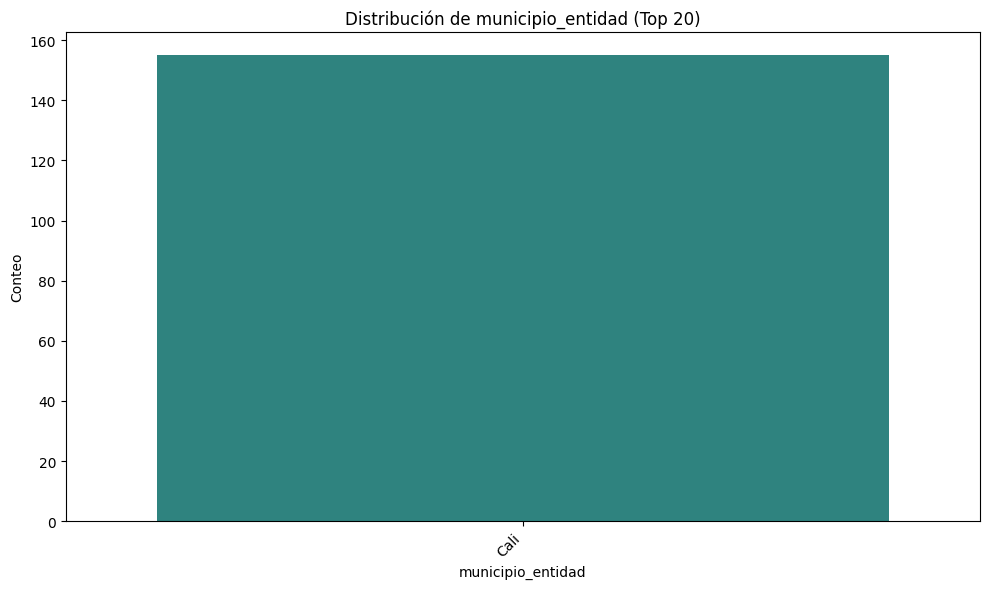

/tmp/ipython-input-833526454.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')


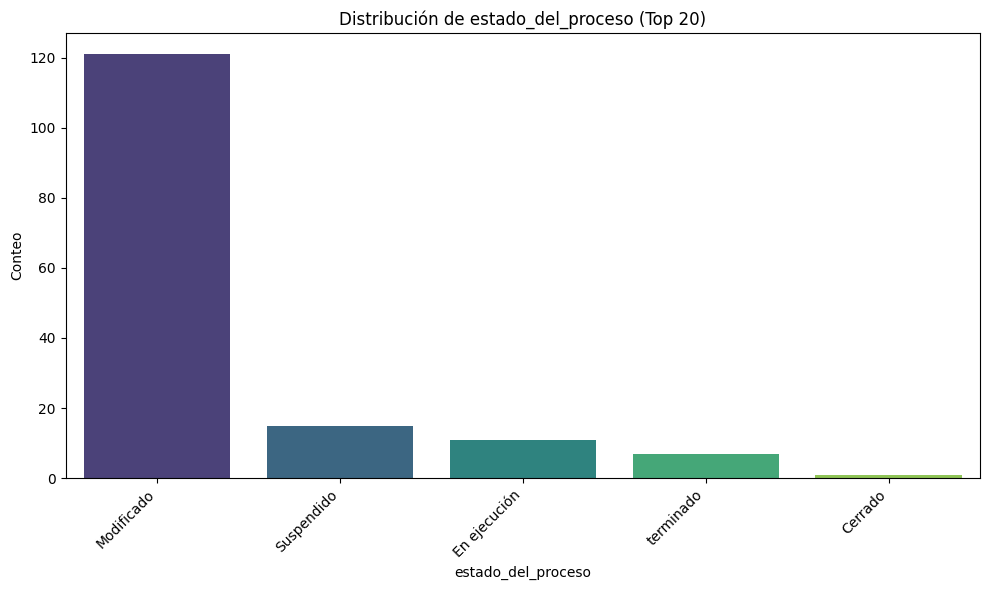

/tmp/ipython-input-833526454.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')


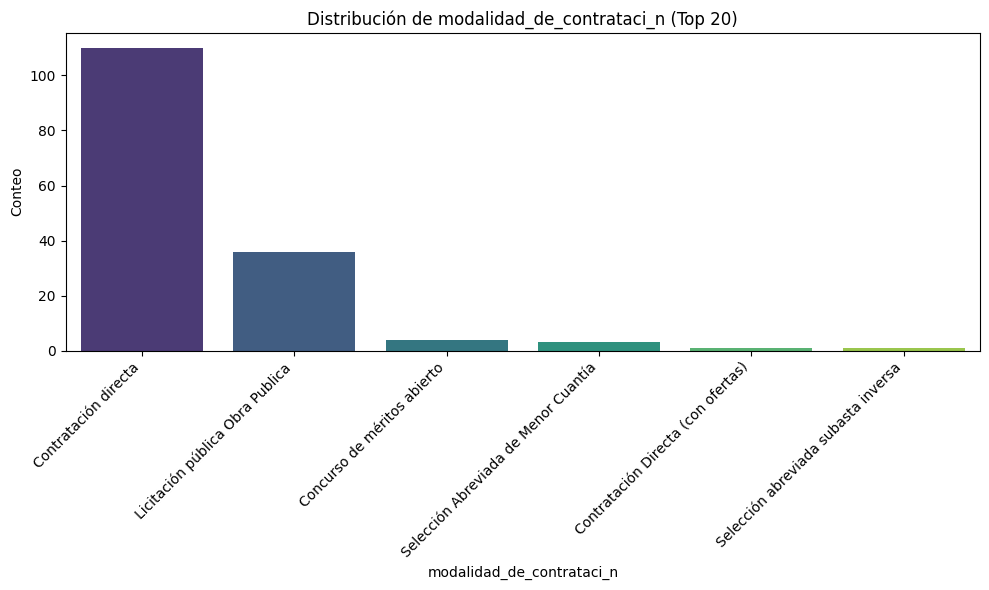

/tmp/ipython-input-833526454.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')


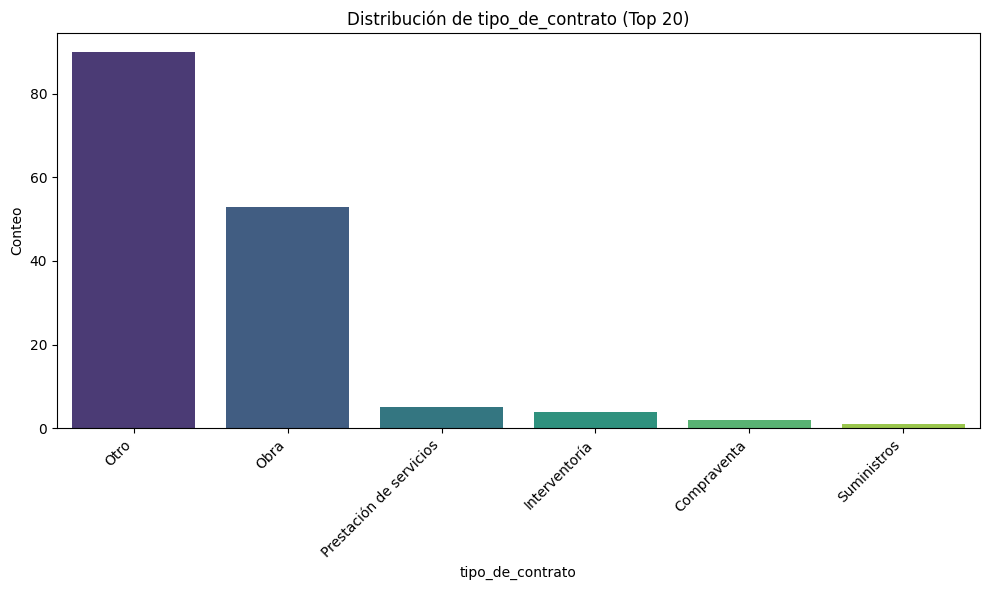

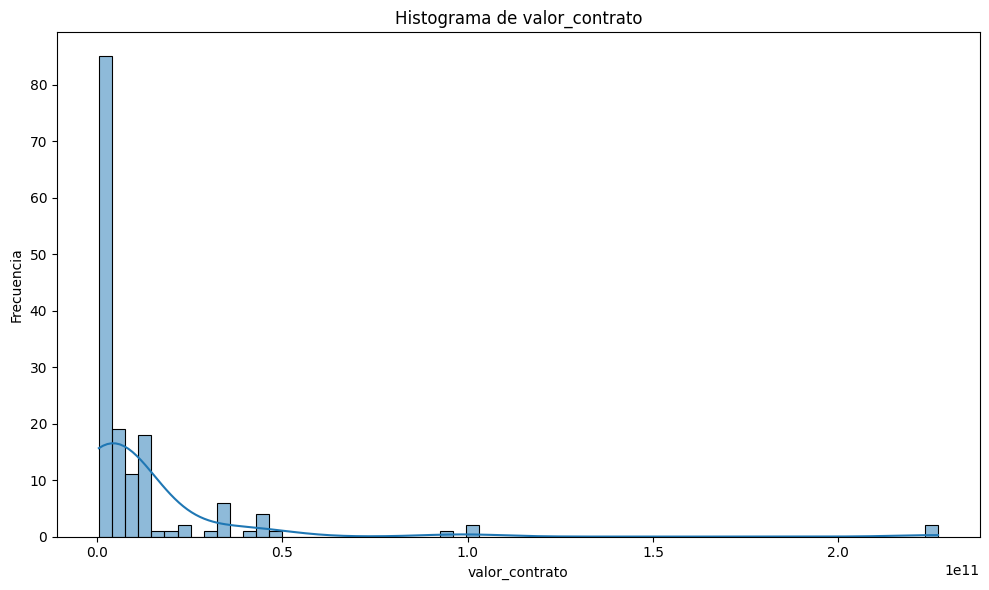

/tmp/ipython-input-833526454.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')


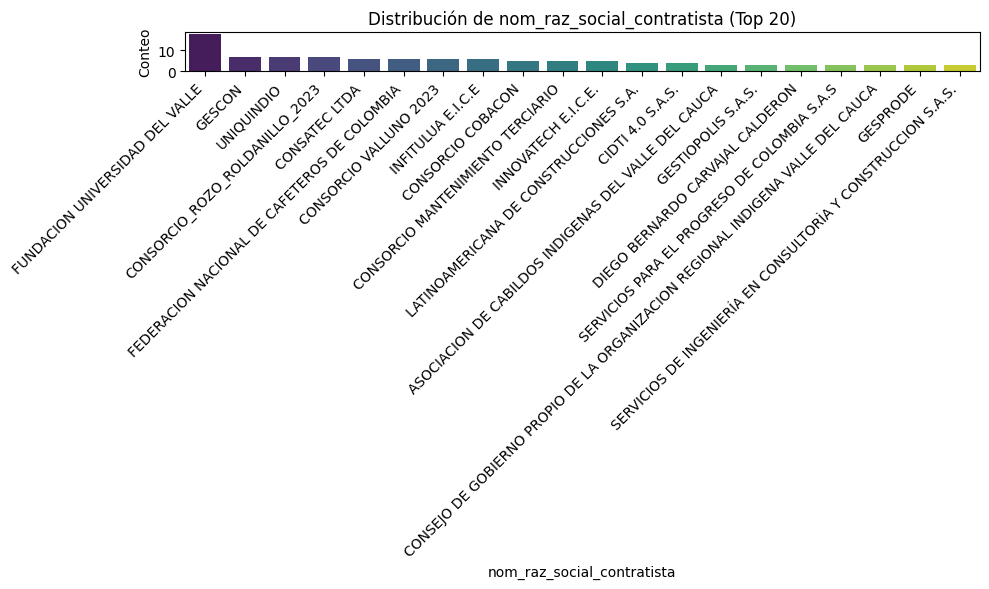

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the path where the CSV was saved
output_path = '/content/drive/MyDrive/filtered_contracts_infraestructura_valle.csv'

# 1. Load the data into a DataFrame
try:
    df_loaded_contracts = pd.read_csv(output_path)
    print(f"DataFrame cargado exitosamente desde: {output_path}")
except FileNotFoundError:
    print(f"Error: El archivo no fue encontrado en {output_path}")
    df_loaded_contracts = pd.DataFrame() # Create an empty DataFrame to avoid errors later

# Check if the DataFrame is not empty before proceeding
if not df_loaded_contracts.empty:
    # Display .info() as requested earlier, now on the loaded DataFrame
    print("\nInformación del DataFrame cargado:")
    df_loaded_contracts.info()

    # Identify columns by index for plotting
    # 5: municipio_entidad
    # 6: estado_del_proceso
    # 7: modalidad_de_contrataci_n
    # 10: tipo_de_contrato
    # 16: valor_contrato
    # 17: nom_raz_social_contratista

    columns_to_plot_indices = [5, 6, 7, 10, 16, 17]
    column_names = df_loaded_contracts.columns[columns_to_plot_indices]

    # Convert 'valor_contrato' to numeric, handling potential errors
    if 'valor_contrato' in column_names:
        # Ensure 'valor_contrato' is converted to a numeric type
        # Socrata API returns it as object, it needs cleaning
        # Assuming it might contain commas or other non-numeric characters
        df_loaded_contracts['valor_contrato'] = pd.to_numeric(
            df_loaded_contracts['valor_contrato'], # Removed .str.replace(',', '')
            errors='coerce'
        )

    print("\nGenerando histogramas/gráficos de barras para las columnas especificadas:")
    for col_name in column_names:
        plt.figure(figsize=(10, 6))
        if pd.api.types.is_numeric_dtype(df_loaded_contracts[col_name]):
            # For numerical columns, plot a histogram
            sns.histplot(df_loaded_contracts[col_name].dropna(), kde=True)
            plt.title(f'Histograma de {col_name}')
            plt.xlabel(col_name)
            plt.ylabel('Frecuencia')
        else:
            # For categorical columns, plot a bar chart of value counts
            # Limiting to top 20 categories for better visualization if many unique values
            top_categories = df_loaded_contracts[col_name].value_counts().nlargest(20)
            sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')
            plt.title(f'Distribución de {col_name} (Top 20)')
            plt.xlabel(col_name)
            plt.ylabel('Conteo')
            plt.xticks(rotation=45, ha='right') # Rotate labels for readability
        plt.tight_layout()
        plt.show()
else:
    print("No se pudo cargar el DataFrame, no se generarán histogramas.")